## STUDENT NAME : PAUL SENTONGO
## ACCESS NUMBER: B00327

1. Pre-process the dataset "Bike_Sales.xlsx" to exclude missing data and outliers.  [2 MARKS]

2. Save the transformed dataset from above as your surname (e.g. Kyal.xlsx) [1 MARK]

3. Generate a machine learning model to classify the variable "Age_Group" in the above transformed dataset. [3 MARKS]

4. Save the above generated model as a job lib or pickle called "age_predictor.joblib" or "age_predictor.pkl" [1 MARK]

5. Using the transformed dataset from question 2 as your training dataset, and the "Bike_sales_Uganda.xlsx" as your testing data;

a) Generate a machine learning model to predict the "Revenue" [4 MARKS]

b) Save the above model as a joblib or pickle called "Revenue_predictor" [1 MARK]

c)Use the "Revenue_predictor" model to predict the "Revenue" in the testing dataset "Bike_sales_Uganda.xlsx" [2 MARKS]

d) Save your output prediction as a csv file labelled "Revenue_prediction.csv" [1 MARK]

IMPORTING LIBRARIES TO BE USED FOR THE TASK

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import joblib

LOADING THE DATASETS

In [79]:
# Load the datasets
bike_sales = pd.read_excel('Bike_Sales.xlsx')
bike_sales_uganda = pd.read_excel('Bike_sales_Uganda.xlsx')

VIEWING THE TOP 2 RECORDS OF THE DATASET

In [80]:
bike_sales.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590


CHEKING INFO OF MY DATASET

In [81]:
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

DESCRIPTIVE STATS

In [82]:
bike_sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2020-01-06 01:36:09.376127744,15.665753,2019.520153,35.919212,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
min,2017-01-01 00:00:00,1.000000,2017.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,2019-01-09 00:00:00,8.000000,2019.000000,28.000000,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,2019-10-16 00:00:00,16.000000,2019.500000,35.000000,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,2021-01-28 00:00:00,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,2021-12-31 00:00:00,31.000000,2021.000000,87.000000,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000
std,NaN,8.781567,1.179704,11.021936,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934


CHECKING SHAPE OF THE DATASET BEFORE TRANSFORMATION

In [83]:
bike_sales.shape

(113036, 18)

CHECKING COLUMNS OF THE DATASET

In [84]:
bike_sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

CHECKING FOR MISSING VALUES OF THE DATASET

In [85]:
# Check for missing values
print("Missing values in each column of Bike_Sales:")
print(bike_sales.isnull().sum())

Missing values in each column of Bike_Sales:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


DATA VISUALIZATION

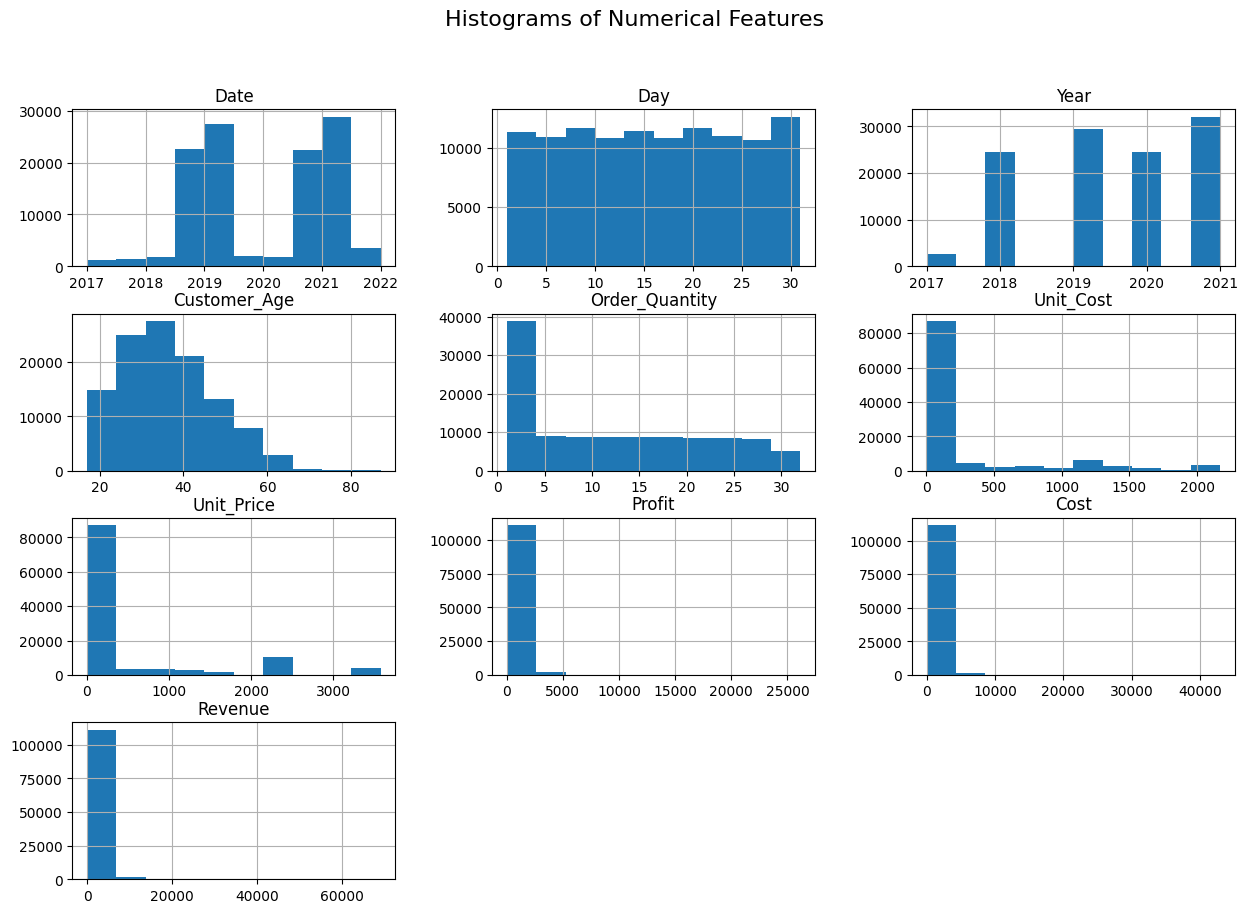

In [86]:
# Data Visualization
## Histograms
bike_sales.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

PLOTTING BAR PLOTS 

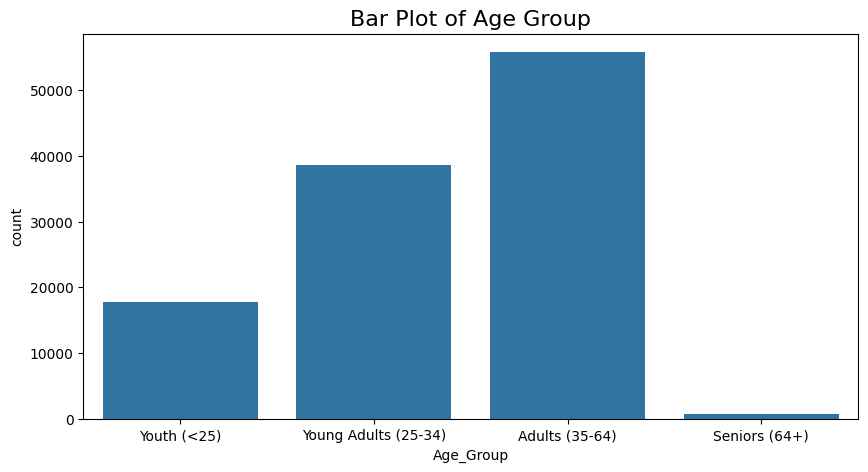

In [87]:
## Bar plots for categorical data
plt.figure(figsize=(10, 5))
sns.countplot(data=bike_sales, x='Age_Group')
plt.title('Bar Plot of Age Group', fontsize=16)
plt.show()

NOTE: While handling outliers has been a hard task, the problem could be due to existence of datetime data type in the dataset and that would call for column transformation, but later i choose to handle outliers separately without transforming the column

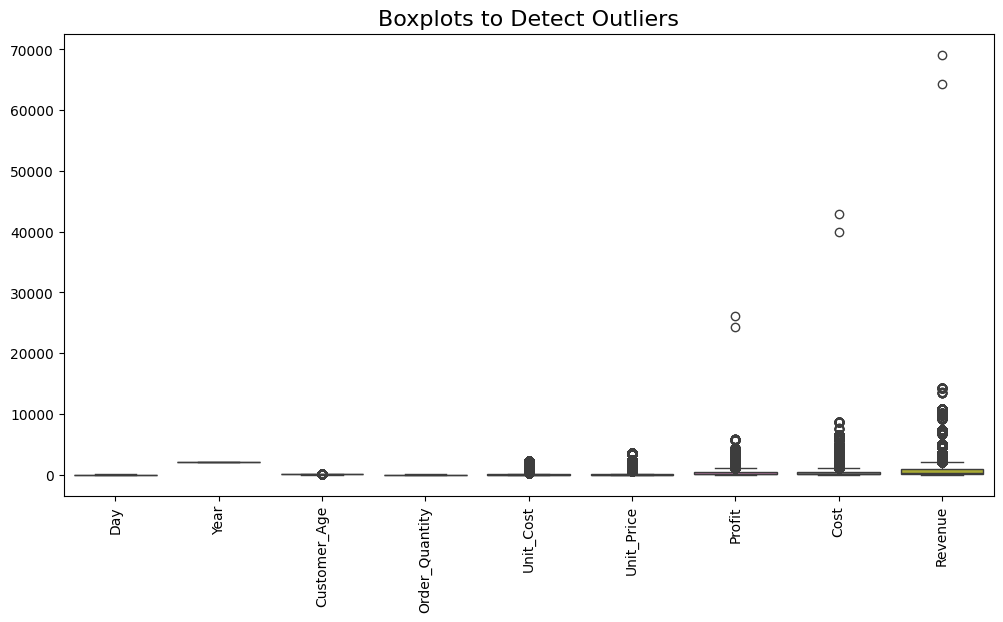

In [88]:
## Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_sales)
plt.xticks(rotation=90)
plt.title('Boxplots to Detect Outliers', fontsize=16)
plt.show()

In [89]:
def calculate_outlier_percentages(df, columns):
    """
    Calculate the percentage of outliers in each specified numeric column using the IQR method.

    Args:
        df (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to check for outliers.

    Returns:
        dict: A dictionary with column names as keys and the percentage of outliers as values.
    """
    percentages = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        percentage = (len(outliers) / len(df)) * 100
        percentages[column] = percentage
    return percentages

def print_outlier_percentages(df, columns):
    """
    Print the percentage of outliers for each specified numeric column and calculate the overall percentage of outliers.

    Args:
        df (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to check for outliers.
    """
    outlier_percentages = calculate_outlier_percentages(df, columns)
    total_outliers = 0
    total_data_points = df.shape[0] * len(columns)
    
    for column, percentage in outlier_percentages.items():
        print(f"Column '{column}' has {percentage:.2f}% outliers")
        total_outliers += (percentage / 100) * df.shape[0]
    
    overall_percentage = (total_outliers / total_data_points) * 100
    print(f"\nOverall percentage of outliers in the dataset: {overall_percentage:.2f}%")

# Load the training dataset
numerical_vars = bike_sales.select_dtypes(include=['number']).columns.tolist()

# Print outlier percentages
print_outlier_percentages(bike_sales, numerical_vars)


Column 'Day' has 0.00% outliers
Column 'Year' has 0.00% outliers
Column 'Customer_Age' has 0.47% outliers
Column 'Order_Quantity' has 0.00% outliers
Column 'Unit_Cost' has 22.99% outliers
Column 'Unit_Price' has 22.99% outliers
Column 'Profit' has 11.45% outliers
Column 'Cost' has 16.08% outliers
Column 'Revenue' has 14.58% outliers

Overall percentage of outliers in the dataset: 9.84%


In [90]:
def calculate_upper_bound(data, column):
    """
    Calculate the upper bound for a column using the IQR method.

    Args:
        data (pd.DataFrame): The dataframe containing the data.
        column (str): The column name for which to calculate the upper bound.

    Returns:
        float: The calculated upper bound.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

def replace_outliers_with_upper_bound(df, columns):
    """
    Replace outliers in the specified columns with the upper bound.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to check for outliers.

    Returns:
        pd.DataFrame: The dataframe with outliers replaced.
    """
    df_cleaned = df.copy()
    for column in columns:
        upper_bound = calculate_upper_bound(df, column)
        df_cleaned[column] = df_cleaned[column].apply(lambda x: min(x, upper_bound))
    return df_cleaned

def calculate_outlier_percentages(df, columns):
    """
    Calculate the percentage of outliers in each specified numeric column using the IQR method.

    Args:
        df (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to check for outliers.

    Returns:
        dict: A dictionary with column names as keys and the percentage of outliers as values.
    """
    percentages = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        percentage = (len(outliers) / len(df)) * 100
        percentages[column] = percentage
    return percentages

def print_outlier_percentages(df, columns):
    """
    Print the percentage of outliers for each specified numeric column and calculate the overall percentage of outliers.

    Args:
        df (pd.DataFrame): The dataframe to process.
        columns (list): List of column names to check for outliers.
    """
    outlier_percentages = calculate_outlier_percentages(df, columns)
    total_outliers = 0
    total_data_points = df.shape[0] * len(columns)
    
    for column, percentage in outlier_percentages.items():
        print(f"Column '{column}' has {percentage:.2f}% outliers")
        total_outliers += (percentage / 100) * df.shape[0]
    
    overall_percentage = (total_outliers / total_data_points) * 100
    print(f"\nOverall percentage of outliers in the dataset: {overall_percentage:.2f}%")


# Columns of interest
columns_with_outliers = ['Customer_Age', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

# Replace outliers with the upper bound
bike_sales_data_cleaned = replace_outliers_with_upper_bound(bike_sales, columns_with_outliers)

# Calculate and print upper bounds for each column
upper_bounds = {column: calculate_upper_bound(bike_sales, column) for column in columns_with_outliers}

print("Upper bounds for the specified variables:")
for column, upper_bound in upper_bounds.items():
    print(f"{column}: {upper_bound}")

# Check the outlier percentages after the replacement of the upper bounds
print("\nOutlier percentages after replacement with upper bounds:")
print_outlier_percentages(bike_sales_data_cleaned, columns_with_outliers)


Upper bounds for the specified variables:
Customer_Age: 65.5
Unit_Cost: 102.0
Unit_Price: 167.5
Profit: 1021.5
Cost: 1038.0
Revenue: 2095.0

Outlier percentages after replacement with upper bounds:
Column 'Customer_Age' has 0.00% outliers
Column 'Unit_Cost' has 0.00% outliers
Column 'Unit_Price' has 0.00% outliers
Column 'Profit' has 0.00% outliers
Column 'Cost' has 0.00% outliers
Column 'Revenue' has 0.00% outliers

Overall percentage of outliers in the dataset: 0.00%


In [91]:
# Save the cleaned dataset as "Sentongo.xlsx"
output_filename = "Sentongo.xlsx"
bike_sales_data_cleaned.to_excel(output_filename, index=False)

print(f"Cleaned dataset saved as {output_filename}")

Cleaned dataset saved as Sentongo.xlsx


In [92]:
bike_sales_data_cleaned = pd.read_excel('Sentongo.xlsx')

In [93]:
bike_sales_data_cleaned.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17.0,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,102,167.5,1021.5,1038,2095
1,2017-01-01,1,January,2017,23.0,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,102,167.5,1021.5,1038,2095


In [94]:
def list_columns_by_type(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    continuous_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    return categorical_columns, continuous_columns

# Get categorical and continuous columns
categorical_columns, continuous_columns = list_columns_by_type(bike_sales_data_cleaned)

print("Categorical Columns:")
print(categorical_columns)

print("\nContinuous Columns:")
print(continuous_columns)

Categorical Columns:
['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']

Continuous Columns:
['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


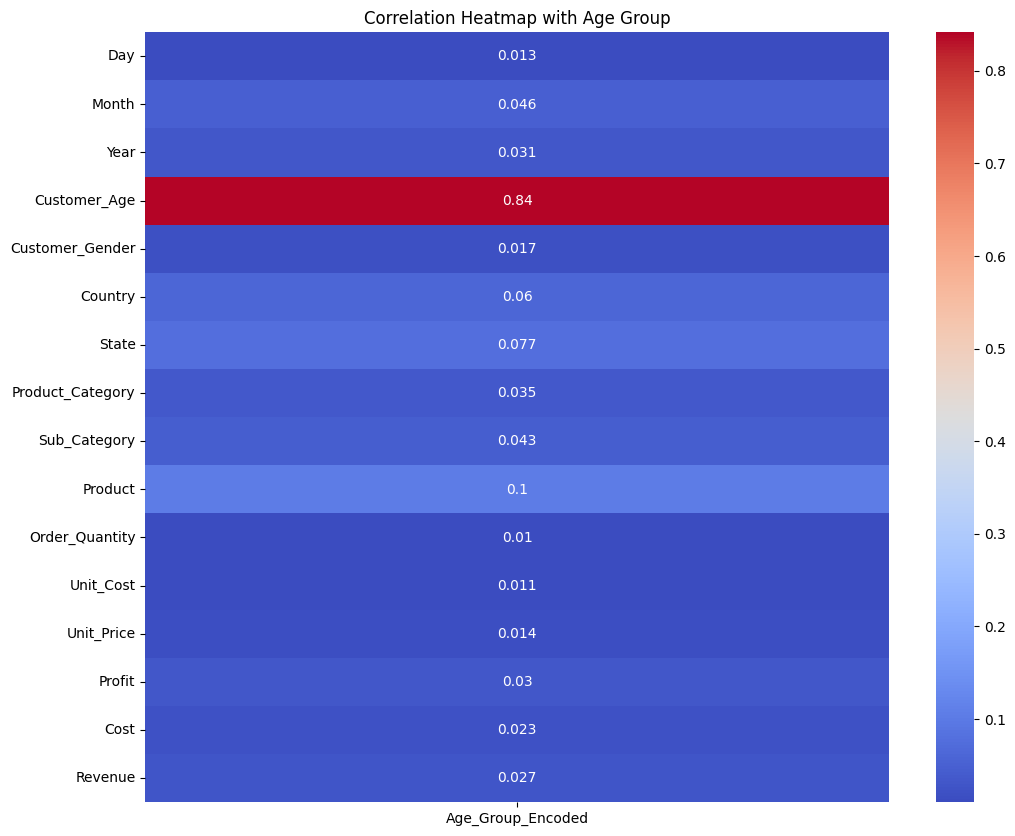

In [95]:
# Encode the Age_Group column
label_encoder = LabelEncoder()
bike_sales_data_cleaned['Age_Group_Encoded'] = label_encoder.fit_transform(bike_sales_data_cleaned['Age_Group'])

# Initialize a correlation matrix
corr_matrix = pd.DataFrame(index=bike_sales_data_cleaned.columns, columns=['Age_Group_Encoded'])

# Calculate correlations for categorical vs. categorical
categorical_columns = ['Month', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
for col in categorical_columns:
    cross_tab = pd.crosstab(bike_sales_data_cleaned[col], bike_sales_data_cleaned['Age_Group_Encoded'])
    chi2, p, dof, ex = chi2_contingency(cross_tab)
    cramer_v = np.sqrt(chi2 / (bike_sales_data_cleaned.shape[0] * min(cross_tab.shape) - 1))
    corr_matrix.loc[col, 'Age_Group_Encoded'] = cramer_v

# Calculate correlations for continuous vs. categorical
continuous_columns = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
for col in continuous_columns:
    corr, p_value = pointbiserialr(bike_sales_data_cleaned['Age_Group_Encoded'], bike_sales_data_cleaned[col])
    corr_matrix.loc[col, 'Age_Group_Encoded'] = np.abs(corr)

# Drop columns not needed
corr_matrix = corr_matrix.dropna()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap with Age Group')
plt.show()

In [96]:
# Generate list of features with highest correlations
high_corr_features = corr_matrix['Age_Group_Encoded'].sort_values(ascending=False)

# Print the features with their correlation values
print("Below are the features with the highest correlation with Age Group:")
for feature, corr_value in high_corr_features.items():
    print(f"{feature}: {corr_value:.4f}")

Below are the features with the highest correlation with Age Group:
Customer_Age: 0.8416
Product: 0.1021
State: 0.0773
Country: 0.0602
Month: 0.0465
Sub_Category: 0.0429
Product_Category: 0.0353
Year: 0.0305
Profit: 0.0304
Revenue: 0.0273
Cost: 0.0229
Customer_Gender: 0.0172
Unit_Price: 0.0145
Day: 0.0132
Unit_Cost: 0.0108
Order_Quantity: 0.0102


High Correlation of Customer_Age:

It makes sense that Customer_Age has a high correlation with Age Group because the Age Group is derived from Customer_Age. This feature is likely to be directly predictive of the target variable.

Low Correlation of Other Features:

The other features have very low correlation values with the Age Group. This suggests that these features do not have a strong linear relationship with the target variable.

PERSONAL ANALYSIS

Even though the other features have low correlation values, some of them might still be useful based on domain knowledge. For instance, Product, Country, and State might still contribute useful information in a more complex relationship that isn't captured by simple correlation measures.

In [97]:
# Encode categorical features
categorical_columns = ['Month', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
df_encoded = pd.get_dummies(bike_sales_data_cleaned, columns=categorical_columns)

In [98]:
# Split data into features and target
X = df_encoded.drop(columns=['Age_Group', 'Age_Group_Encoded', 'Date'])
y = bike_sales_data_cleaned['Age_Group_Encoded']

In [99]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Top features based on Random Forest importance:
                   importance
Customer_Age         0.706140
Day                  0.038363
Profit               0.020553
Revenue              0.020031
Cost                 0.019759
Order_Quantity       0.019150
Year                 0.010783
Customer_Gender_M    0.007133
Customer_Gender_F    0.007106
Unit_Price           0.005339


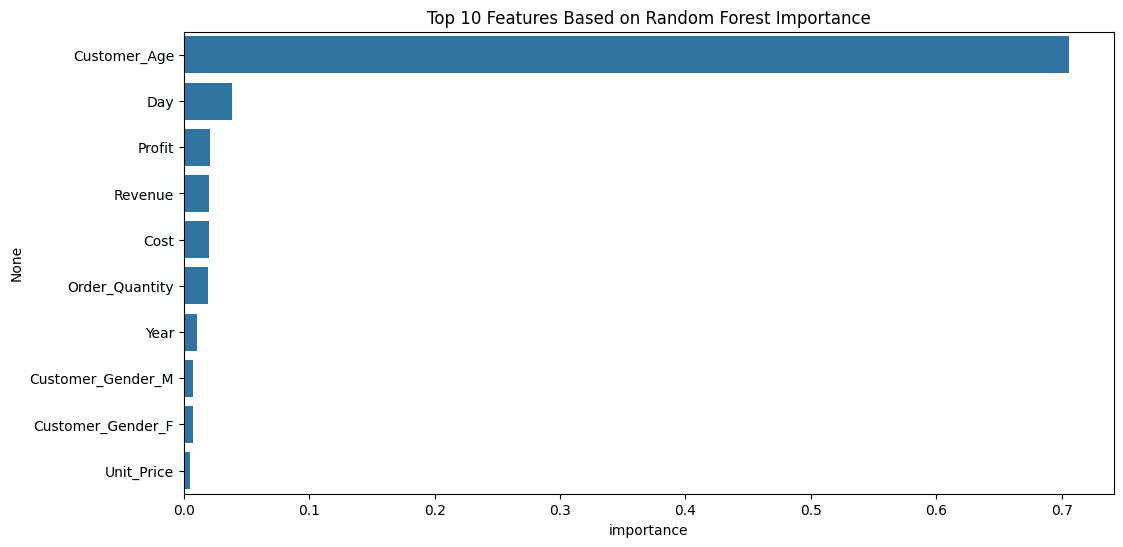

In [101]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the top features
print("Top features based on Random Forest importance:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.head(10).importance, y=feature_importances.head(10).index)
plt.title('Top 10 Features Based on Random Forest Importance')
plt.show()

Based on the feature importances from the Random Forest model, let's select the top features and retrain the model using these features. Then, we will save the trained model as age_predictor.joblib

In [110]:
# Select the top features
top_features = ['Customer_Age', 'Day', 'Profit', 'Revenue', 'Cost', 'Order_Quantity','Year','Unit_Price']

In [111]:
# Split data into features and target
X = bike_sales_data_cleaned[top_features]
y = bike_sales_data_cleaned['Age_Group_Encoded']

In [112]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
# Save the model
joblib_file = "age_predictor.joblib"
joblib.dump(rf, joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as age_predictor.joblib


In [116]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = rf.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11147
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00      7703
           3       1.00      1.00      1.00      3590

    accuracy                           1.00     22608
   macro avg       1.00      1.00      1.00     22608
weighted avg       1.00      1.00      1.00     22608

Accuracy Score:
1.0


#### 5. Using the transformed dataset from question 2 as your training dataset, and the "Bike_sales_Uganda.xlsx" as your testing data;

## TASKS
Step 1: Load and Clean the Datasets
First, we'll load the datasets "Sentongo.xlsx" (training) and "Bike_sales_Uganda.xlsx" (testing), clean them, and prepare them for modeling.

Step 2: Train the Machine Learning Model
We'll train a machine learning model to predict the "Revenue" using the cleaned training dataset.

Step 3: Save the Model
The trained model will be saved using joblib or pickle as "Revenue_predictor".

Step 4: Predict Revenue on Testing Data
We'll use the saved model to predict "Revenue" for the testing dataset.

Step 5: Save the Predictions
Finally, we'll save the output predictions as a CSV file named "Revenue_prediction.csv".

In [4]:
# Load the training dataset
bike_sales = pd.read_excel('Sentongo.xlsx')

In [124]:
# Visualize data to understand it better
def visualize_data(bike_sales):
    # Pair plot for numerical variables
    sns.pairplot(bike_sales.select_dtypes(include=['float64', 'int64']))
    plt.show()

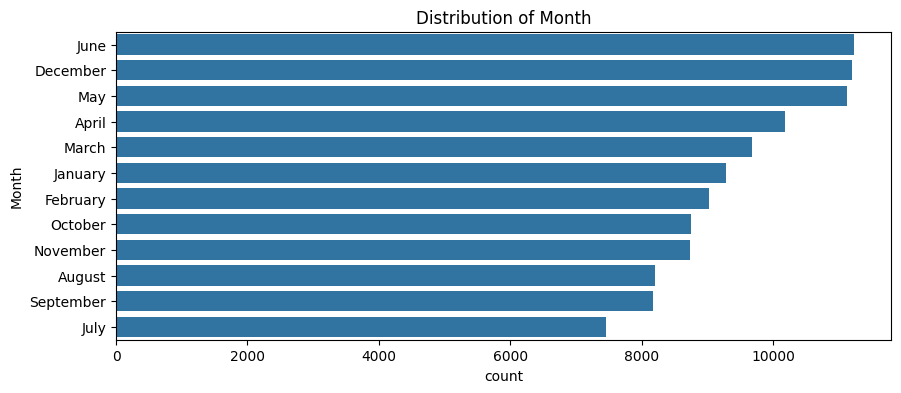

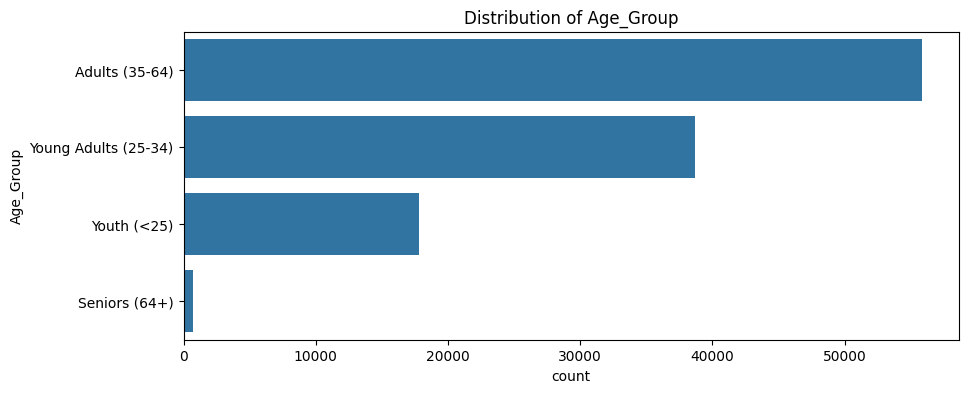

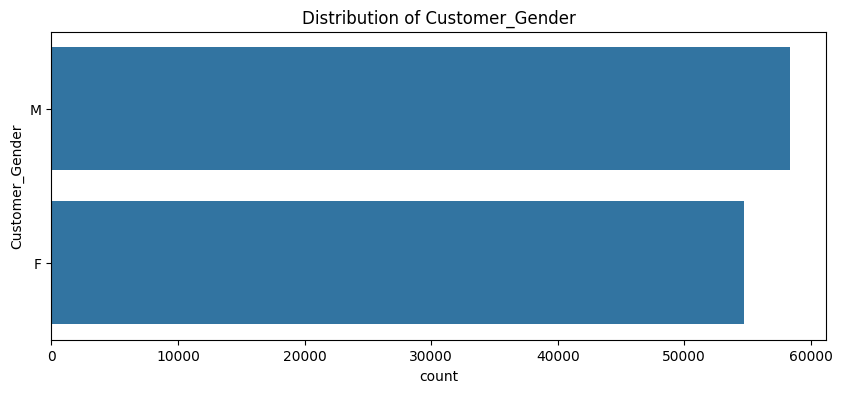

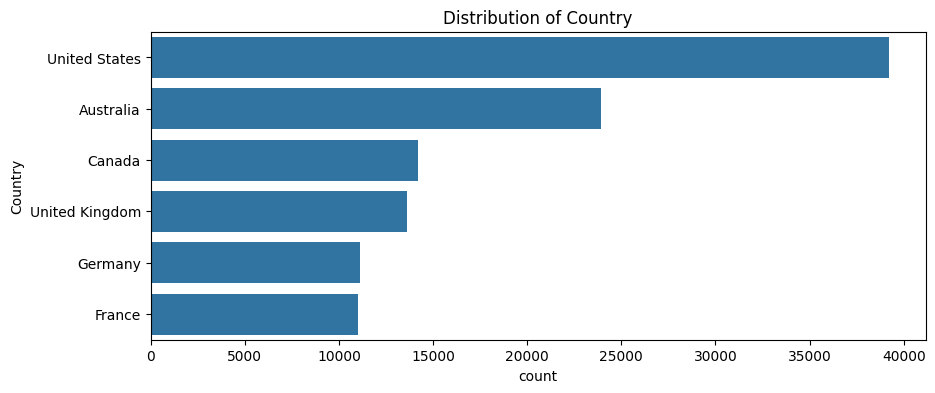

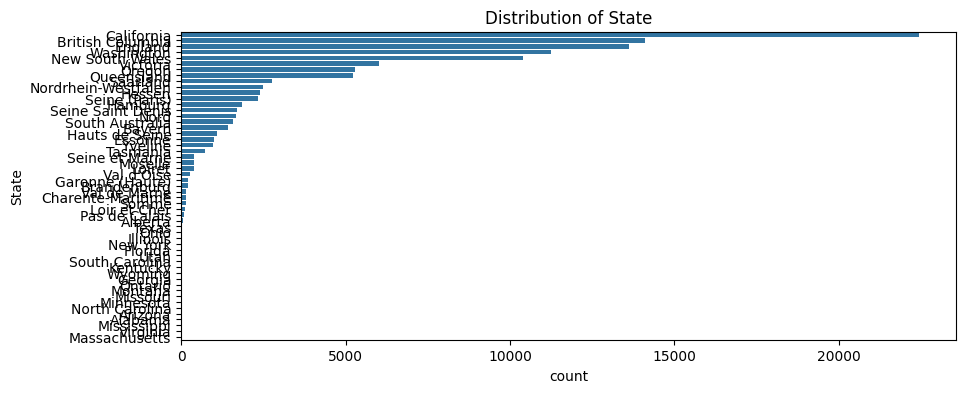

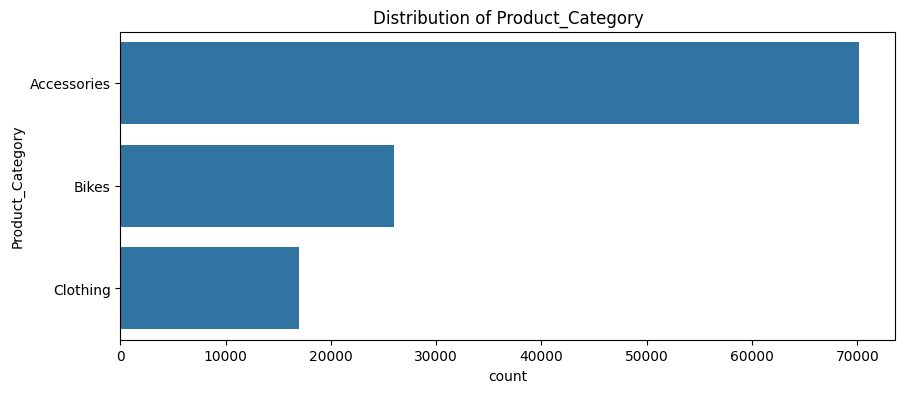

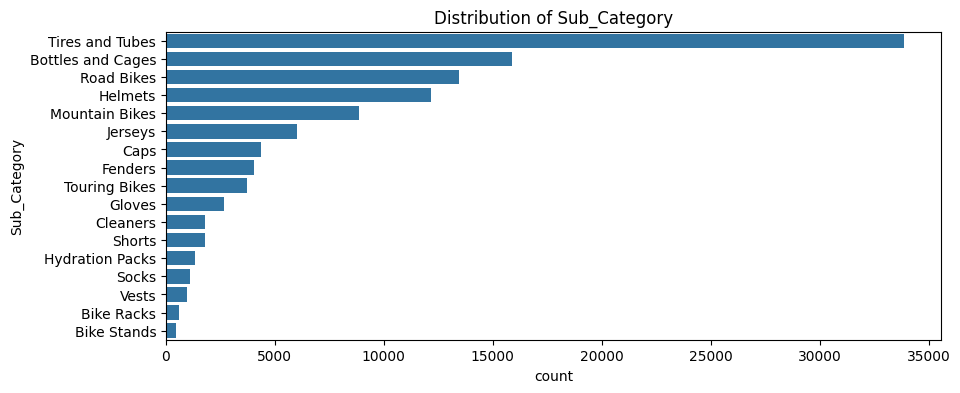

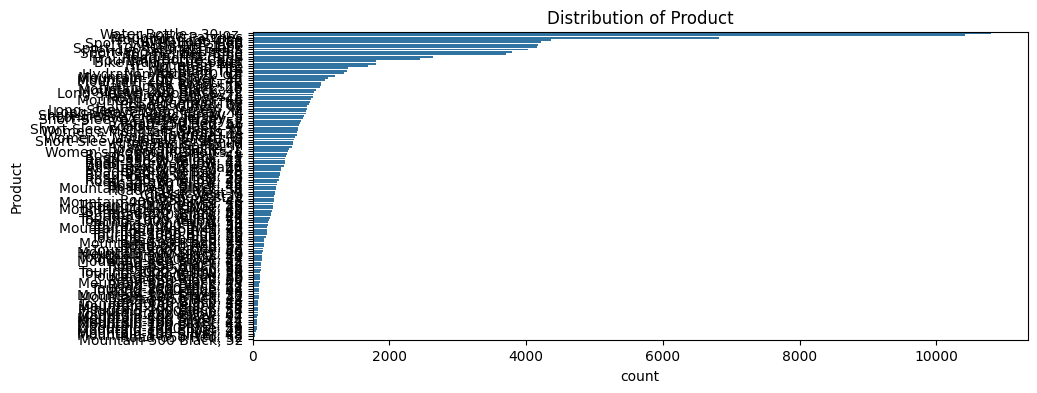

In [125]:
 # Count plots for categorical variables
for col in bike_sales.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=bike_sales[col], order=bike_sales[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()

In [126]:
bike_sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [127]:
# Step 1: Identify and list all categorical variables
def list_categorical_variables(bike_sales):
    categorical_columns = bike_sales.select_dtypes(include=['object', 'category']).columns
    print("Categorical Variables:")
    for col in categorical_columns:
        print(col)
    return categorical_columns

categorical_columns = list_categorical_variables(bike_sales)

Categorical Variables:
Month
Age_Group
Customer_Gender
Country
State
Product_Category
Sub_Category
Product


In [5]:
# Clean the training data
def clean_data(bike_sales):
    bike_sales = bike_sales.copy()
    
    # Convert categorical variables to appropriate type
    categorical_columns = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
    for col in categorical_columns:
        bike_sales[col] = bike_sales[col].astype('category')
        
    return bike_sales

bike_sales_cleaned = clean_data(bike_sales)

In [6]:
# Preprocess training data
def preprocess_data(bike_sales):
    bike_sales = pd.get_dummies(bike_sales, drop_first=True)  # One-hot encoding
    return bike_sales

bike_sales_encoded = preprocess_data(bike_sales_cleaned)

In [7]:
# Define features and target variable
X = bike_sales_encoded.drop(['Revenue', 'Date'], axis=1)
y = bike_sales_encoded['Revenue']

In [8]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Build the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Evaluate the model on validation set
y_val_pred = rf_regressor.predict(X_val)
print("Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("R2 Score:", r2_score(y_val, y_val_pred))

Mean Squared Error: 0.011264384288747197
R2 Score: 0.9999999785222673


In [14]:
# Save the model
joblib.dump(rf_regressor, 'Revenue_predictor.joblib')
print("Model saved as 'Revenue_predictor.joblib'.")

Model saved as 'Revenue_predictor.joblib'.


In [15]:
# Load the testing dataset
bike_sales_test = pd.read_excel('Bike_sales_Uganda.xlsx')

First few rows of the dataset:
         Date  Day      Month  Year  Customer_Age             Age_Group  \
0  2018-07-01    1       June  2020            33  Young Adults (25-34)   
1  2018-07-01    1       July  2020            41        Adults (35-64)   
2  2018-07-01    1     August  2020            33  Young Adults (25-34)   
3  2018-07-01    1  September  2020            37        Adults (35-64)   
4  2018-07-01    1    October  2020            30  Young Adults (25-34)   

  Customer_Gender Country       State Product_Category       Sub_Category  \
0               F  Uganda     Western      Accessories    Tires and Tubes   
1               M  Uganda     Eastern      Accessories  Bottles and Cages   
2               F  Uganda    Northern      Accessories    Tires and Tubes   
3               M  Uganda  South_West      Accessories    Tires and Tubes   
4               F  Uganda    Southern      Accessories    Tires and Tubes   

               Product  Order_Quantity  Unit_Cost  Unit

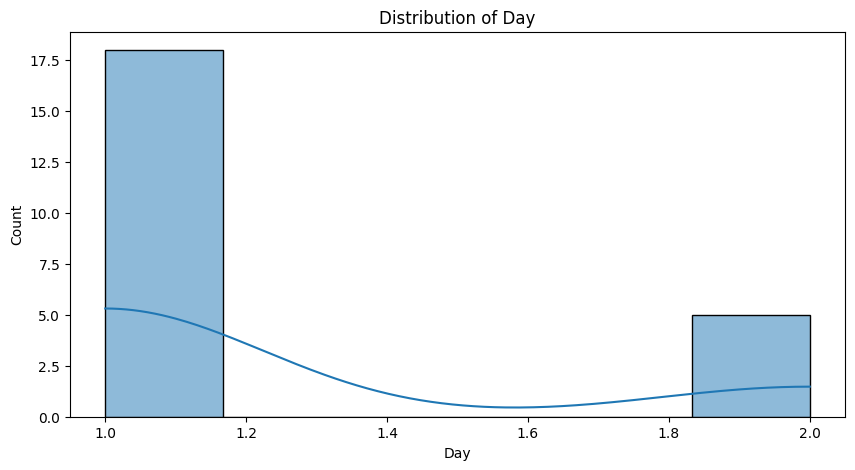

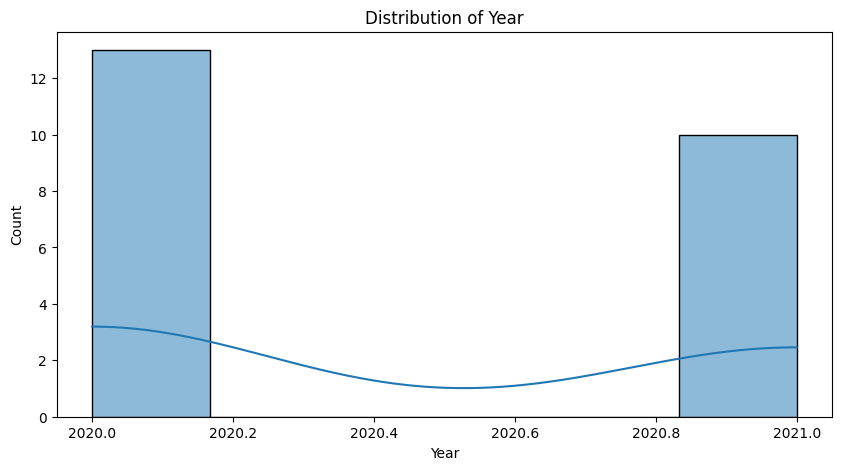

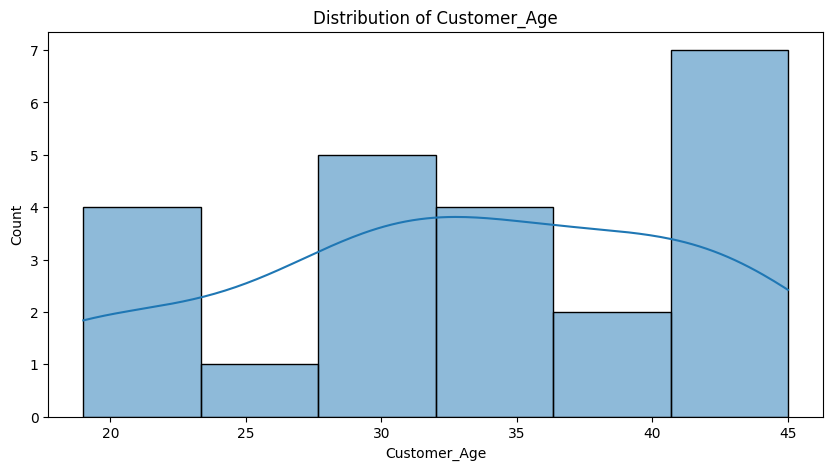

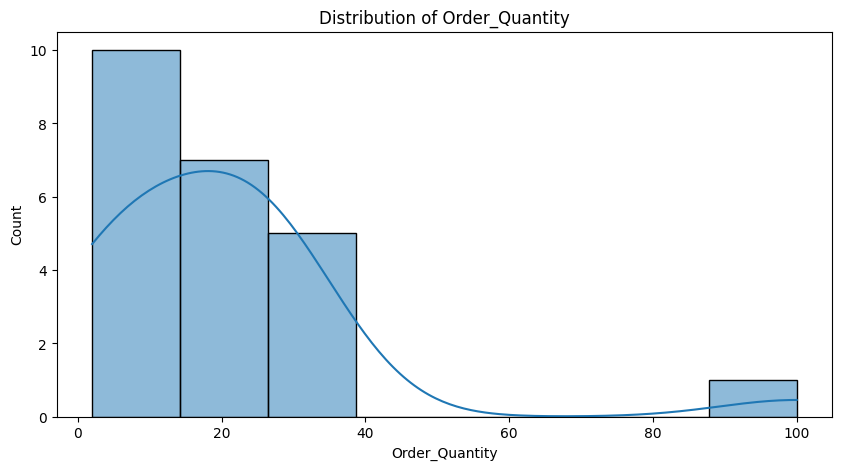

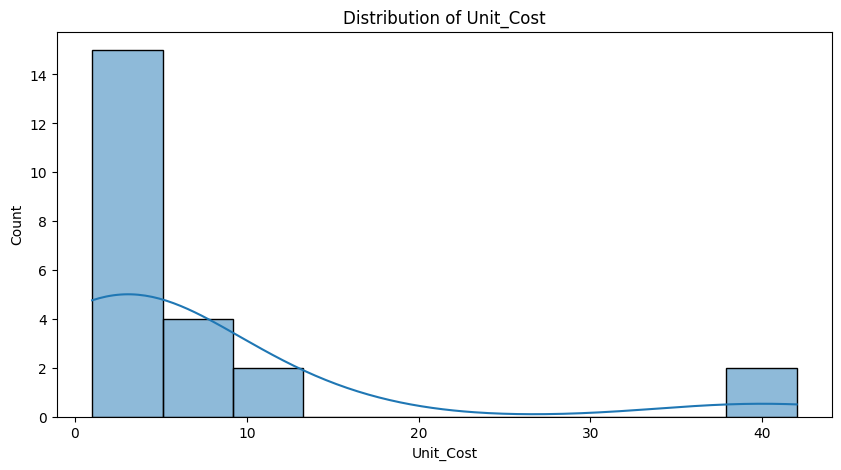

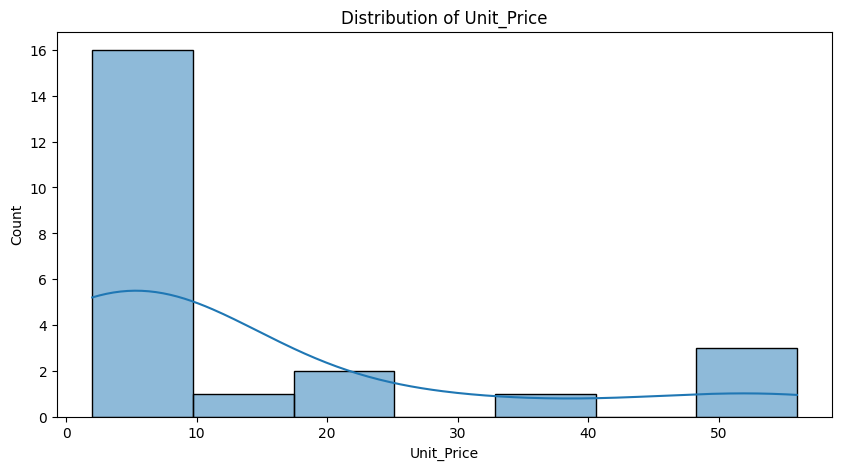

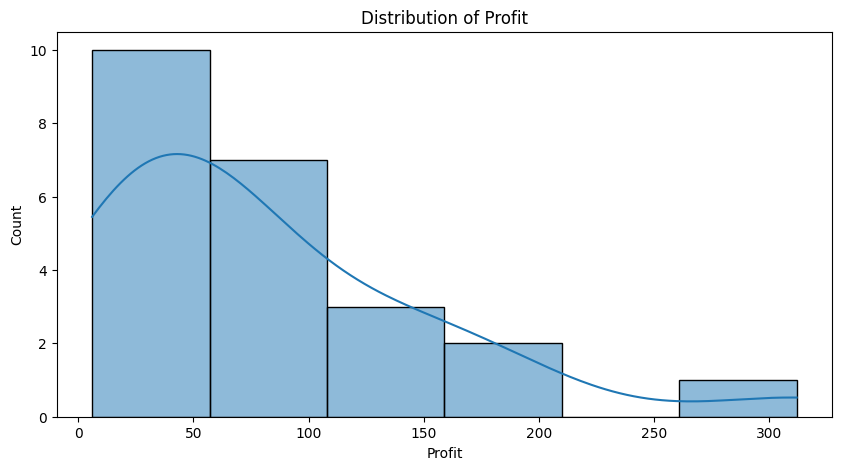

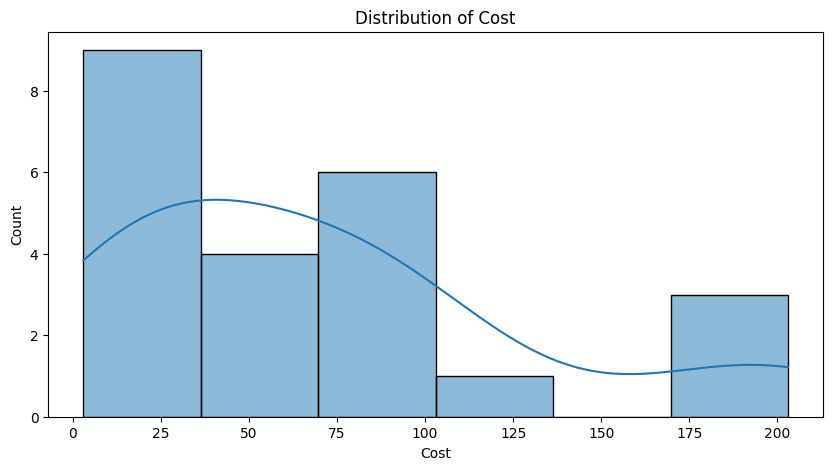

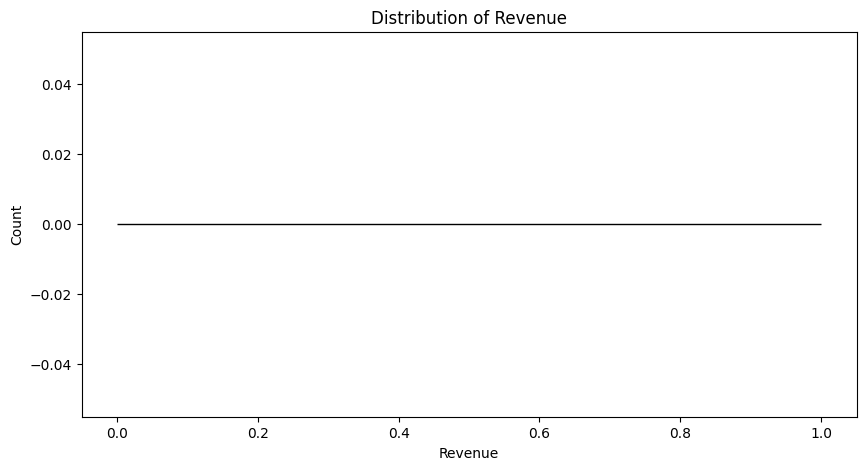

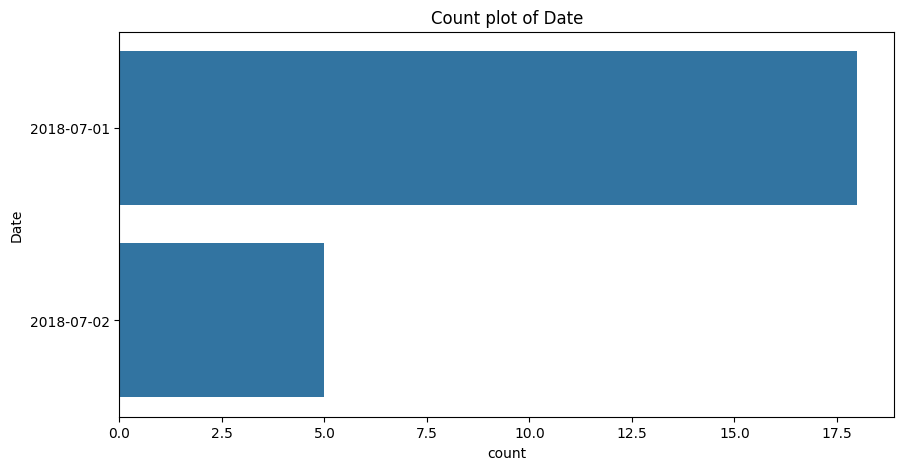

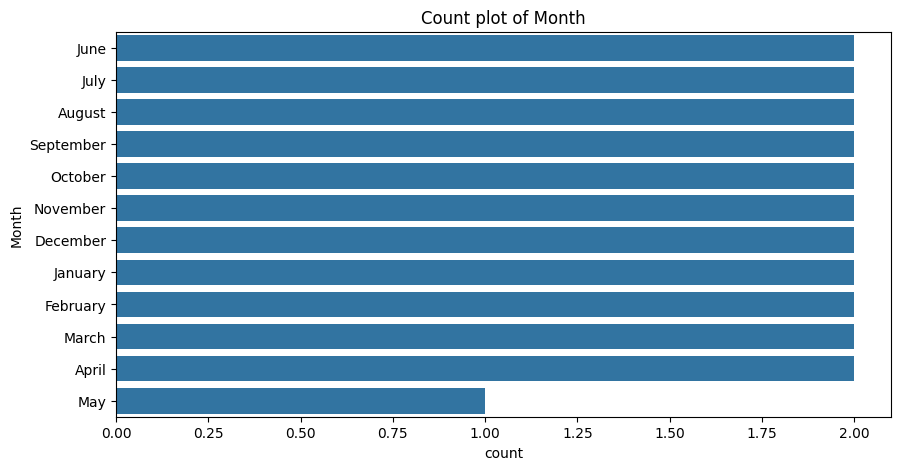

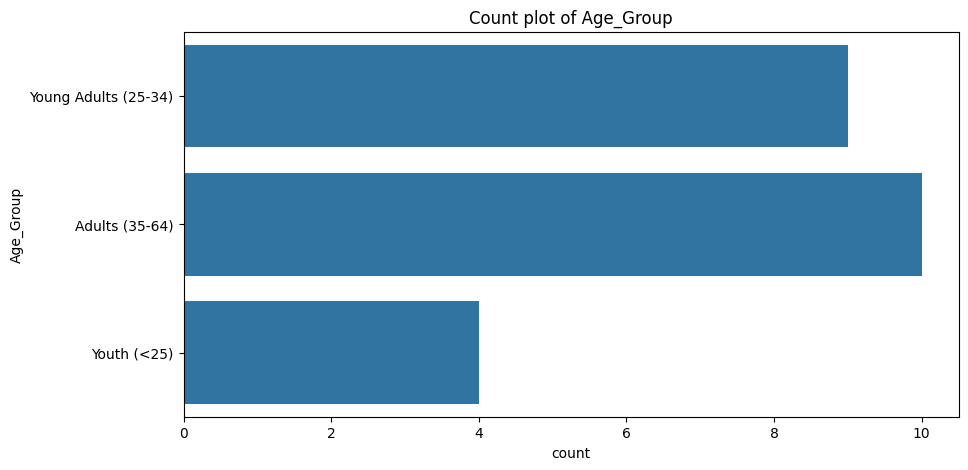

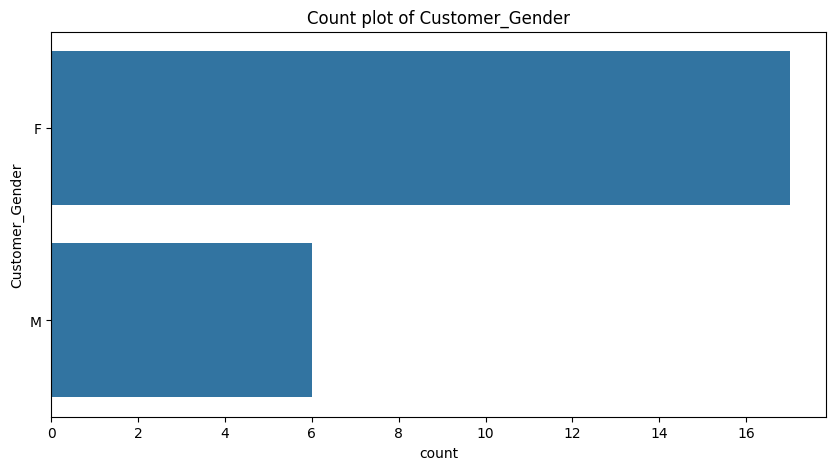

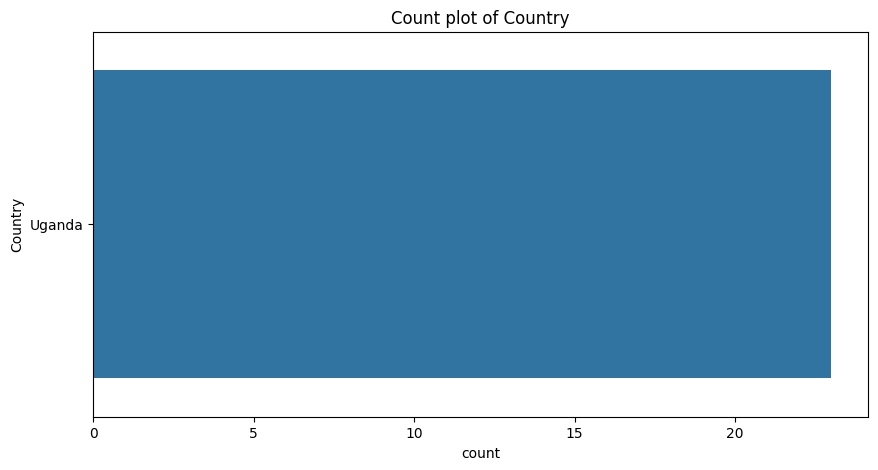

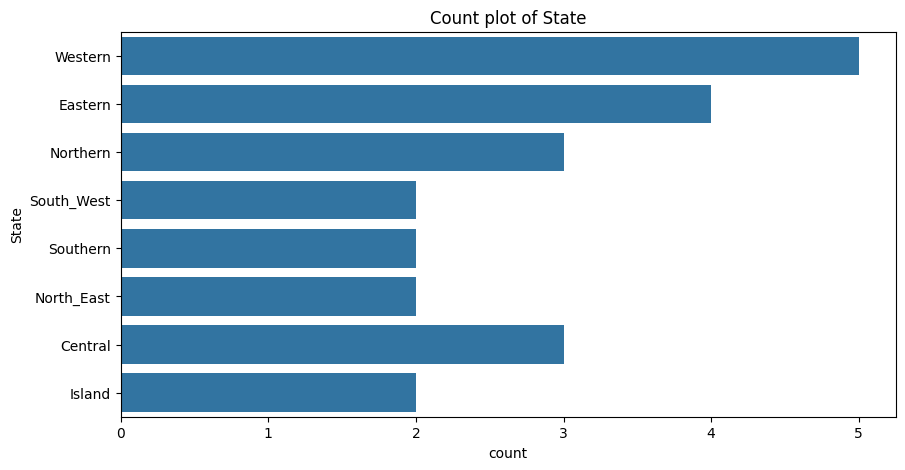

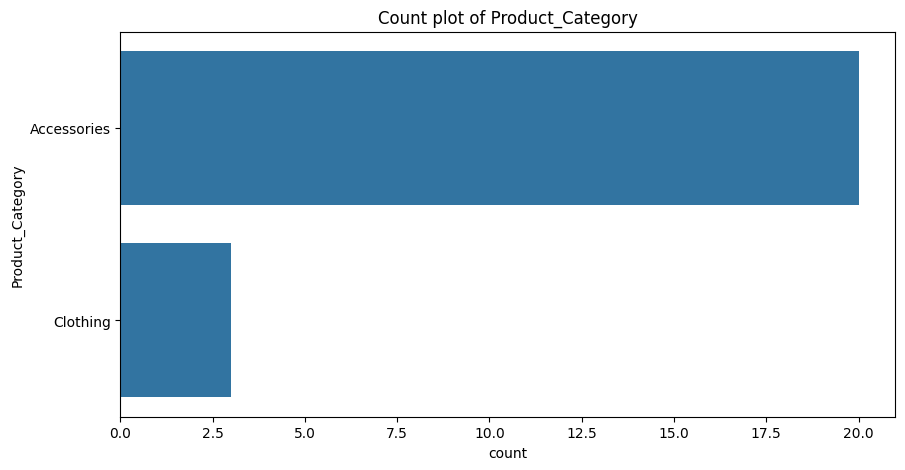

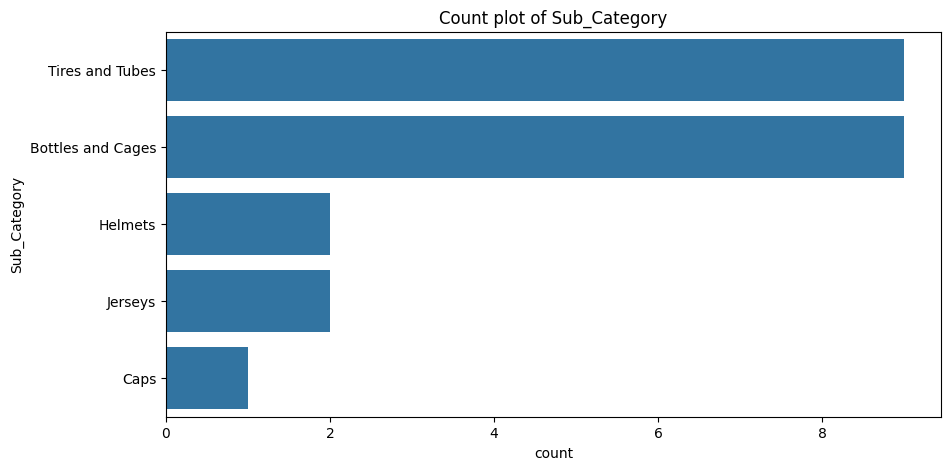

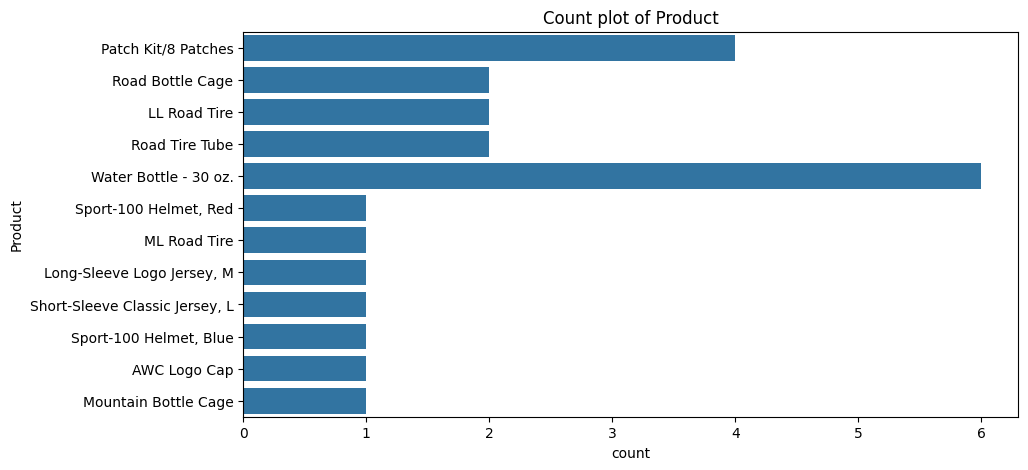

In [17]:
# Step 1: Visualize the Testing Dataset
def visualize_data(bike_sales_test):
    print("First few rows of the dataset:")
    print(bike_sales_test.head())
    print("\nSummary statistics:")
    print(bike_sales_test.describe(include='all'))
    print("\nMissing values per column:")
    print(bike_sales_test.isnull().sum())
    numerical_columns = bike_sales_test.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(bike_sales_test[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
    categorical_columns = bike_sales_test.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=bike_sales_test[col])
        plt.title(f'Count plot of {col}')
        plt.show()

visualize_data(bike_sales_test)

In [18]:
# Step 2: Clean the Testing Dataset
def clean_data(bike_sales_test):
    numerical_columns = bike_sales_test.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        bike_sales_test[col].fillna(bike_sales_test[col].median(), inplace=True)
    categorical_columns = bike_sales_test.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        bike_sales_test[col].fillna(bike_sales_test[col].mode()[0], inplace=True)
    if 'Date' in bike_sales_test.columns:
        bike_sales_test['Date'] = pd.to_datetime(bike_sales_test['Date'], errors='coerce')
    return bike_sales_test

bike_sales_test_cleaned = clean_data(bike_sales_test)

In [19]:
# Step 3: Preprocess the Testing Data
def preprocess_data(bike_sales_test_cleaned):
    categorical_columns = bike_sales_test_cleaned.select_dtypes(include=['object', 'category']).columns
    column_transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
        ],
        remainder='passthrough'
    )
    df_encoded = column_transformer.fit_transform(bike_sales_test_cleaned)
    df_encoded = pd.DataFrame(df_encoded, columns=column_transformer.get_feature_names_out())
    return df_encoded

bike_sales_test_encoded = preprocess_data(bike_sales_test_cleaned)

In [20]:
# Step 4: Align Columns of Testing Data with Training Data
missing_cols = set(X.columns) - set(bike_sales_test_encoded.columns)
for col in missing_cols:
    bike_sales_test_encoded[col] = 0
bike_sales_test_encoded = bike_sales_test_encoded[X.columns]

In [21]:
# Step 5: Predict the Revenue on the Testing Dataset
revenue_predictions = rf_regressor.predict(bike_sales_test_encoded)

In [22]:
# Step 6: Save the Predictions as a CSV File
output_df = bike_sales_test.copy()
output_df['Predicted_Revenue'] = revenue_predictions
output_df.to_csv('Revenue_prediction.csv', index=False)
print("Predictions saved as 'Revenue_prediction.csv'.")

Predictions saved as 'Revenue_prediction.csv'.


In [5]:
revenue_predictions = pd.read_csv('Revenue_prediction.csv')

In [7]:
revenue_predictions.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Predicted_Revenue
0,2018-07-01,1,June,2020,33,Young Adults (25-34),F,Uganda,Western,Accessories,Tires and Tubes,Patch Kit/8 Patches,100,1,2,30,30,NaN,2.0
1,2018-07-01,1,July,2020,41,Adults (35-64),M,Uganda,Eastern,Accessories,Bottles and Cages,Road Bottle Cage,28,3,9,168,84,NaN,2.0
2,2018-07-01,1,August,2020,33,Young Adults (25-34),F,Uganda,Northern,Accessories,Tires and Tubes,Patch Kit/8 Patches,24,1,2,24,24,NaN,2.0
3,2018-07-01,1,September,2020,37,Adults (35-64),M,Uganda,South_West,Accessories,Tires and Tubes,LL Road Tire,24,6,3,312,192,NaN,2.0
4,2018-07-01,1,October,2020,30,Young Adults (25-34),F,Uganda,Southern,Accessories,Tires and Tubes,Road Tire Tube,22,1,4,66,22,NaN,2.0
